# Ejercicios Primera Parte. Física de Redes Complejas y Aplicaciones Interdisciplinares.
#### Carlos J. Ramos Salas.
En este notebook se podrán conseguir los códigos y soluciones a los ejercicios propuestos para entregar en el curso de Física de Redes Complejas y Aplicaciones Interdisciplinares. Por comodidad, muchos de los códigos usados no se presentan acá si no que se definen como funciones externas las cuales pueden ser encontradas en el repositorio de [GitHub asociado](https://github.com/ashybabashyba/RedesComplejasUGR) (https://github.com/ashybabashyba/RedesComplejasUGR).

##### Librerias necesarias:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

## Capítulo 1: Introducción a los sistemas complejos.

### Ejercicio 1
Simular y analizar el comportamiento complejo del atrayente de Lorentz.
$\begin{align}
    \dfrac{dx}{dt} &= a(y-x), \\
    \dfrac{dy}{dt} &= x(b-z)-y, \\
    \dfrac{dz}{dt} &= xy-cz.
\end{align}$

Las ecuaciones diferenciales se resuelven de manera numérica por medio de un algoritmo de Runge-Kutta presentado en el archivo "RungeKutTa.m".

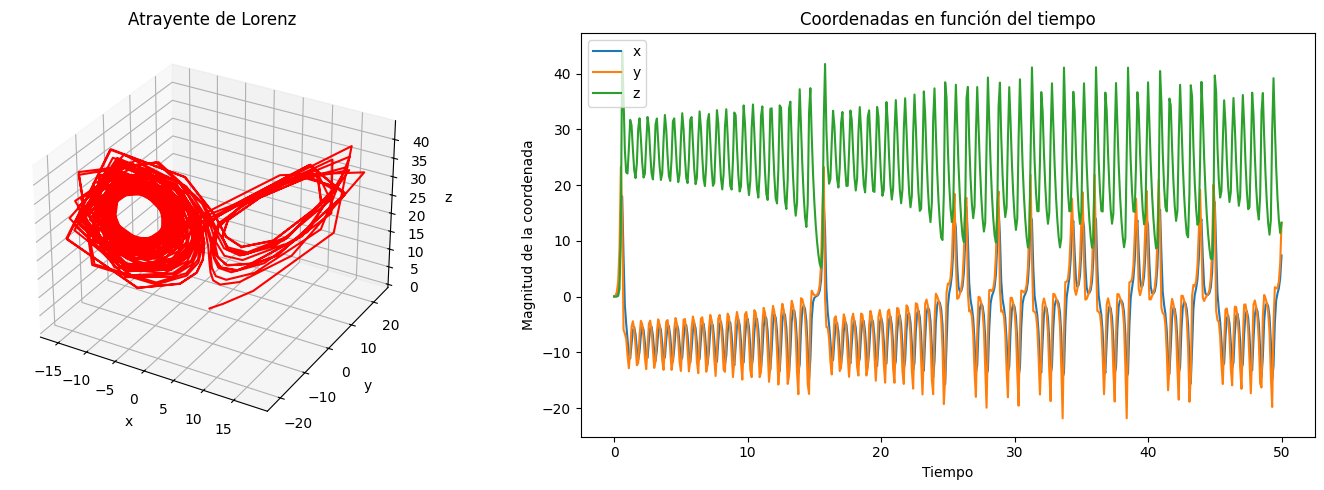

In [3]:
from Codigos import RungeKutta
a=10
b=28
c=8/3

Lorenz=RungeKutta.CrearFuncionLorenz(a,b,c)

# Condiciones iniciales y parámetros
y0 = [0.1, 0.0, 0.0]
t_span = [0, 50]
h = 0.1

# Resolver el sistema de ecuaciones utilizando RK4
t_values, y_values = RungeKutta.runge_kutta_4th_order(Lorenz, y0, t_span, h)

# Crear una figura con subgráficos 3D
fig = plt.figure(figsize=(15, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(y_values[:, 0], y_values[:, 1], y_values[:, 2], color='red')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Atrayente de Lorenz')

# Subgráfico 2
ax2 = fig.add_subplot(122)
ax2.plot(t_values, y_values[:, 0], label='x')
ax2.plot(t_values, y_values[:, 1], label='y')
ax2.plot(t_values, y_values[:, 2], label='z')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Magnitud de la coordenada')
ax2.legend()
ax2.set_title('Coordenadas en función del tiempo')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se puede observar que en el caso donde $a=0$ se obtiene que la variable x se mantiene constante en su valor inicial como era de esperar, y se obtiene una trayectoria curva en el plano $yz$. Al cambiar el valor a $a=0.1$ la trayectoria cambia completamente su forma ya que la coordenada $x$ tiende a reducir su tamaño en el tiempo. Si se coloca como punto inicial para resolver numéricamente la ecuación al origen, se obtiene que la solución corresponde al mismo origen en todo instante de tiempo, mostrando entonces una estabilidad para todos los valores de $a,b,c$; al cambiar una sola coordenada del punto inicial a $0.1$ la solución cambia radicalmente mostrando evolución de todas las demás, aunque nuevamente, la trayectoria resultante está determinada por los valores de $a,b,c$.

En conclusión, tanto las coordenadas iniciales como las constantes multiplicativas terminan determinando toda la dinámica del problema, se muestra que en efecto pequeños cambios en estos parámetros dan como resultados trayectorias diferentes, por lo que se puede decir que el atrayente de Lorenz tiene un comportamiento caótico. Aún así, el comportamiento más raro y popular que presenta el atrayente de Lorenz se obtiene al fijar $a=10, b=28$ y $c=8/3$.

### Ejercicio 2
Simular y analizar el comportamiento complejo del atrayente de Rössler.
$\begin{align}
    \dfrac{dx}{dt} &= -y-z, \\
    \dfrac{dy}{dt} &= x+a*y, \\
    \dfrac{dz}{dt} &= b+z(x-c).
\end{align}$

Nuevamente se resuelve numéricamente por medio de un algoritmo de Runge-Kutta, la diferencia respecto al ejercicio anterior es que ya no se usa la función "CrearFuncionLorenz" si no "CrearFuncionRossler".

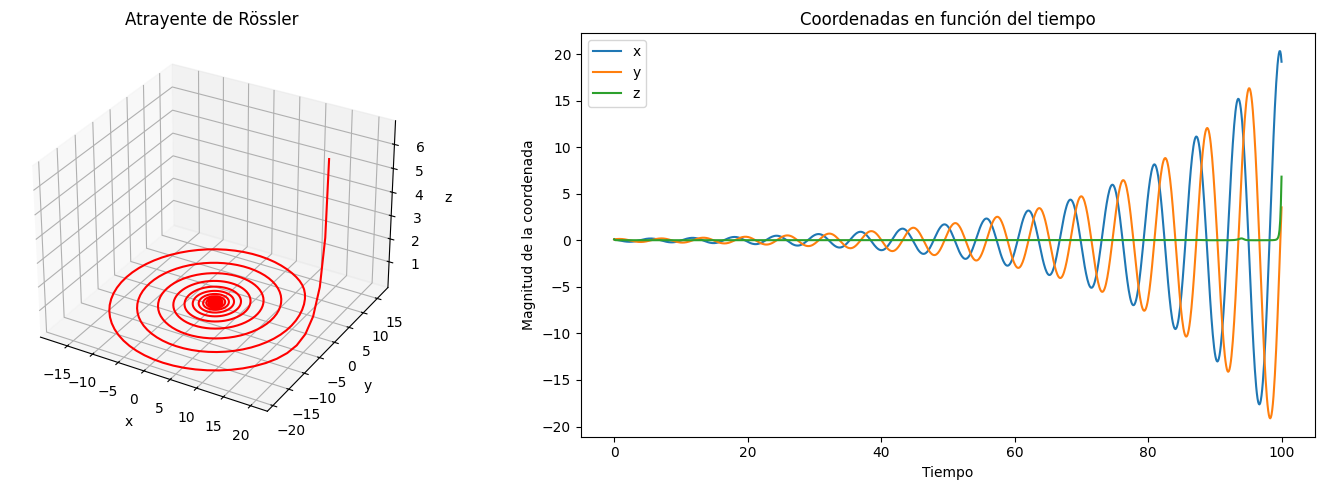

In [4]:
from Codigos import RungeKutta
a=0.1
b=0.1
c=14

Lorenz=RungeKutta.CrearFuncionRossler(a,b,c)

# Condiciones iniciales y parámetros
y0 = [0.1, 0.1, 0.1]
t_span = [0, 100]
h = 0.1

# Resolver el sistema de ecuaciones utilizando RK4
t_values, y_values = RungeKutta.runge_kutta_4th_order(Lorenz, y0, t_span, h)

# Crear una figura con subgráficos 3D
fig = plt.figure(figsize=(15, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(y_values[:, 0], y_values[:, 1], y_values[:, 2], color='red')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Atrayente de Rössler')

# Subgráfico 2
ax2 = fig.add_subplot(122)
ax2.plot(t_values, y_values[:, 0], label='x')
ax2.plot(t_values, y_values[:, 1], label='y')
ax2.plot(t_values, y_values[:, 2], label='z')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Magnitud de la coordenada')
ax2.legend()
ax2.set_title('Coordenadas en función del tiempo')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En este caso para el análisis de complejidad se dejan fijas las constantes $a,b,c$ en unos de los valores típicos usados para el estudio de este problema, los cuales corresponden a $a=b=0.1$ y $c=14$. Si la coordenada inicial es el cero, la gráfica resultante asemeja a una espiral con pico en el punto de origen, si cambiamos uno de los puntos iniciales a $0.1$ la gráfica resultante cambia un montón presentando ahora una curva con un máximo local, cambiar las otras coordenadas iniciales de magnitud a $0.1$ cambian la posición, magnitud y número de máximos locales que aparecen en el gráfico de la solución.

### Ejercicio 3
Simular el juego de la vida y estudiar su comportamiento emergente.

El código utilizado es una adaptación del código que se puede encontrar en este [enlace](https://hescaso.github.io/gameoflife/). Al ejecutarse se abrirá una ventana aparte donde una nave espacial hace su recorrido. Se puede pausar oprimiendo cualquier tecla (excepto escape) y en ese momento se podrá "encender" o "dar vida" a cuadros para poner la condición a estudiar a voluntad, para retomar el avance solo hay que volver a oprimir cualquier tecla (excepto escape nuevamente). Finalmente, para cerrar la ventana del juego y detener la ejecución del mismo, basta con oprimir la tecla ESC (escape), teniendo en cuenta que en el notebook luego aparecerá una ventana de error.

In [ ]:
# Importamos las librerías necesarias:
import pygame
import numpy as np
import time

# Para comenzar vamos a crear la pantalla de nuestro juego
pygame.init()

width = 600
height = 600

screem = pygame.display.set_mode((height, width))

bg = 25, 25, 25
screem.fill(bg)

# Número de celdas
ncX, ncY = 50, 50

# Dimensiones de las celdas
dimCW = width / ncX
dimCH = height / ncY

#Estado de las celdas. Vivas = 1; Muertas = 0
gameState = np.zeros((ncX, ncY))

# Autómata andar
gameState[21, 21] = 1
gameState[22, 22] = 1
gameState[22, 23] = 1
gameState[21, 23] = 1
gameState[20, 23] = 1

# Control de la ejecución del juego
pauseExect = False

# Bucle de ejecución
while True:

    # Creamos un copia del gameState sobre la que haremos los cambios,
    # para que se realicen a la vez en cada vuelta del bucle
    newGameState = np.copy(gameState)

    # Coloreamos la pantalla totalmente de gris cada vuelta.
    screem.fill (bg)

    # Creamos un lapso de tiempo para que se aprecie mejor el movimiento
    time.sleep(0.1)

    # Registramos eventos del teclado y ratón
    ev = pygame.event.get()

    for event in ev:
        # Detectamos si se presiona una tecla
        if event.type == pygame.QUIT:
            pygame.quit()
            quit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                pygame.quit()
                quit()

            pauseExect = not pauseExect
        # Detectamos si se presiona el ratón
        mouseClick = pygame.mouse.get_pressed()

        if sum(mouseClick) > 0:
            posX, posY = pygame.mouse.get_pos()
            celX, celY = int(np.floor(posX / dimCW)), int(np.floor(posY / dimCH))
            newGameState[celX, celY] = 1

    for y in range(0, ncX):
        for x in range(0, ncY):

            if  not pauseExect:

                # Calculamos el número de vecinos cercanos
                n_neigh = gameState[(x-1) % ncX, (y-1) % ncY] + \
                        gameState[(x)   % ncX, (y-1) % ncY] + \
                        gameState[(x+1) % ncX, (y-1) % ncY] + \
                        gameState[(x-1) % ncX, (y)   % ncY] + \
                        gameState[(x+1) % ncX, (y)   % ncY] + \
                        gameState[(x-1) % ncX, (y+1) % ncY] + \
                        gameState[(x)   % ncX, (y+1) % ncY] + \
                        gameState[(x+1) % ncX, (y+1) % ncY]

                # Rule 1: Una celda muerta con exactamente 3 vecinas vivas, "revive".
                if gameState[x, y] == 0 and n_neigh == 3:
                    newGameState[x, y] = 1

                # Rule 2: Una celda viva con menos de 2 o más de 3 celdas vivas alrededor muere.
                elif gameState[x, y] == 1 and (n_neigh < 2 or n_neigh > 3):
                    newGameState[x, y] = 0

            # Creamos el polígono de cada celda a dibujar
            poly = [((x) * dimCW, y * dimCH),
                    ((x + 1) * dimCW, y * dimCH),
                    ((x + 1) * dimCW, (y + 1) * dimCH),
                    ((x) * dimCW, (y + 1) * dimCH)]

            # Y dibujamos la celda para cada par de X e Y.
            if newGameState[x, y] == 0:
                pygame.draw.polygon(screem, (128, 128, 128), poly, 1)
            else:
                pygame.draw.polygon(screem, (255, 255, 255), poly, 0)

    # Actualizamos el estado del juegos
    gameState = np.copy(newGameState)

    # Actualizamos la pantalla
    pygame.display.flip()